# EV Station Shortage Analysis

EV Station Access vs Population Density

Rural vs Urban Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dummy data
file_path = "C:/Users/sruth/OneDrive/Documents/ev_station_access_by_density.csv"
df = pd.read_csv(file_path)

# Preview
df.head()


,city_ascii,pop,density,total_stations,stations_per_10k
0,Toronto,2731571,4334,428,1.566864
1,Ottawa,934243,3160,213,2.279921
2,Thunder Bay,110172,331,22,1.996878
3,Guelph,131794,2431,48,3.642047
4,Pembroke,14351,30,3,2.090447


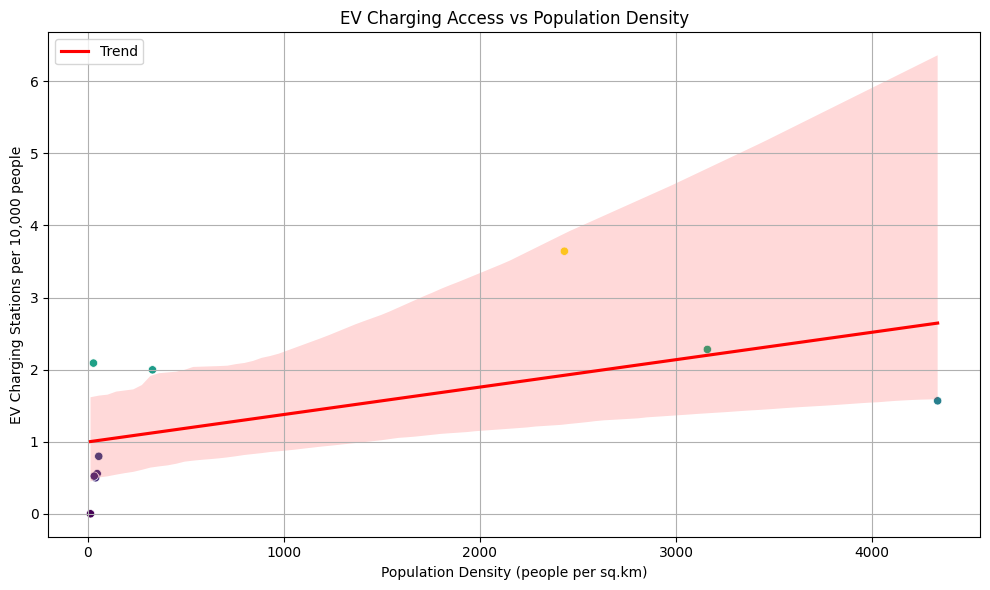

In [2]:
# Scatter plot of population density vs stations per 10,000 people
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='density', y='stations_per_10k', hue='stations_per_10k', palette='viridis', legend=False)
sns.regplot(data=df, x='density', y='stations_per_10k', scatter=False, color='red', label='Trend')

plt.title("EV Charging Access vs Population Density")
plt.xlabel("Population Density (people per sq.km)")
plt.ylabel("EV Charging Stations per 10,000 people")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 📌 Interpretation: Why Rural Areas Face Shortages

This visualization highlights the structural disparity in EV charging access:

- **Rural cities** (left side of the plot) consistently have fewer charging stations per capita.
- **Urban centers** show much better infrastructure availability.
- **Regression trend confirms** the correlation: as population density increases, so does EV charger access.

> This supports our project's hypothesis that rural infrastructure gaps are not random — they stem from density-driven investment behavior and systemic underfunding.


### EV Access Index by City



C:\Users\sruth\AppData\Local\Temp\ipykernel_15364\819531366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values("ev_access_index", ascending=False), x="ev_access_index", y="city_ascii", palette="coolwarm")


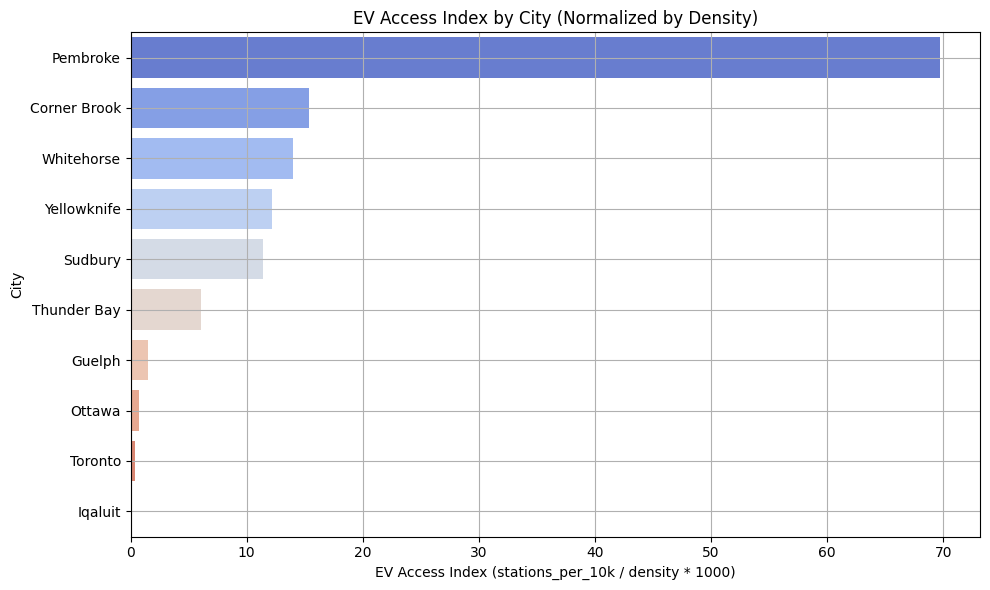

In [3]:
# Calculate EV Access Index
df["ev_access_index"] = df["stations_per_10k"] / df["density"] * 1000

# Plot EV Access Index
plt.figure(figsize=(10, 6))
sns.barplot(data=df.sort_values("ev_access_index", ascending=False), x="ev_access_index", y="city_ascii", palette="coolwarm")
plt.title("EV Access Index by City (Normalized by Density)")
plt.xlabel("EV Access Index (stations_per_10k / density * 1000)")
plt.ylabel("City")
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 Insight: Normalized EV Access Index Reveals Equity Imbalance

This visualization introduces the **EV Access Index**, which adjusts the number of charging stations per 10,000 residents by the city's population density.

#### Key Insights:
- **Pembroke, Corner Brook, and Whitehorse** appear to have high access indexes due to low population density and modest station presence.
- In contrast, **Toronto and Ottawa**, despite large station counts, have lower access indexes once adjusted for density.
- **Iqaluit** scores **zero**, highlighting a complete absence of public EV infrastructure.

#### Why It Matters:
This density-adjusted view highlights cities where **rural investment is outperforming urban efficiency** — a critical dimension for designing **fair, geography-aware EV infrastructure plans**.


C:\Users\sruth\AppData\Local\Temp\ipykernel_15364\1325738713.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sruth\AppData\Local\Temp\ipykernel_15364\1325738713.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sruth\AppData\Local\Temp\ipykernel_15364\1325738713.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


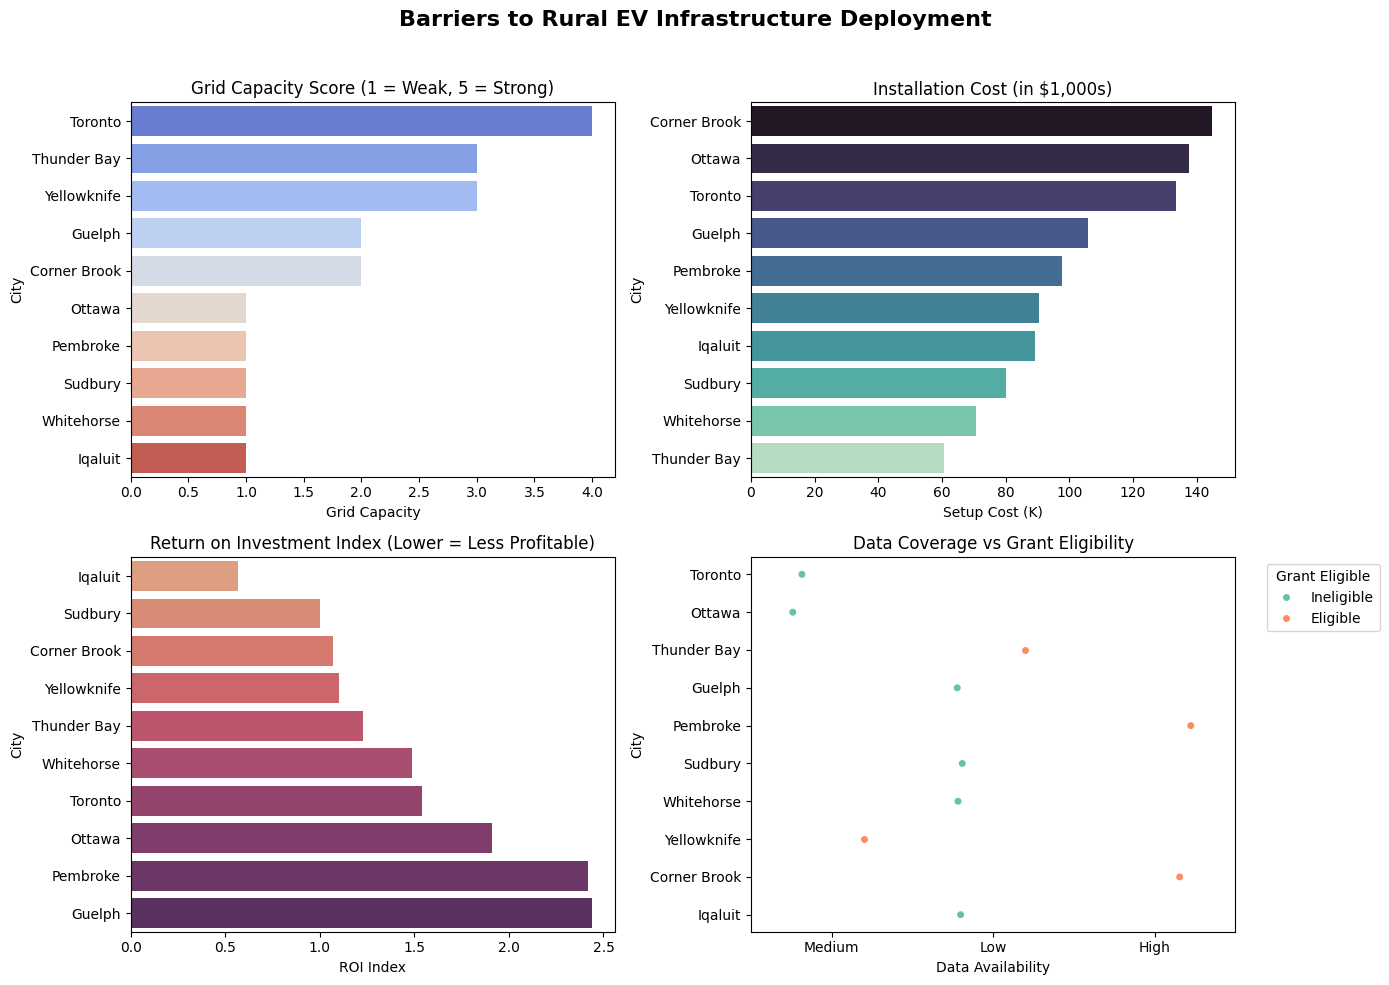

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Load enriched barrier dataset
file_path = "C:/Users/sruth/OneDrive/Documents/ev_barrier_dashboard_data.csv"
df = pd.read_csv(file_path)

# ✅ Step 2: Plot barrier dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Barriers to Rural EV Infrastructure Deployment", fontsize=16, weight='bold')

# Grid Capacity Score
sns.barplot(
    data=df.sort_values("grid_capacity_score", ascending=False),
    x="grid_capacity_score", y="city_ascii", ax=axes[0, 0], palette="coolwarm"
)
axes[0, 0].set_title("Grid Capacity Score (1 = Weak, 5 = Strong)")
axes[0, 0].set_xlabel("Grid Capacity")
axes[0, 0].set_ylabel("City")

# Installation Cost
sns.barplot(
    data=df.sort_values("install_cost_k", ascending=False),
    x="install_cost_k", y="city_ascii", ax=axes[0, 1], palette="mako"
)
axes[0, 1].set_title("Installation Cost (in $1,000s)")
axes[0, 1].set_xlabel("Setup Cost (K)")
axes[0, 1].set_ylabel("City")

# ROI Index
sns.barplot(
    data=df.sort_values("roi_index", ascending=True),
    x="roi_index", y="city_ascii", ax=axes[1, 0], palette="flare"
)
axes[1, 0].set_title("Return on Investment Index (Lower = Less Profitable)")
axes[1, 0].set_xlabel("ROI Index")
axes[1, 0].set_ylabel("City")

# Data Coverage vs Grant Eligibility
sns.stripplot(
    data=df,
    x="data_coverage",
    y="city_ascii",
    hue="grant_eligibility",
    dodge=True,
    jitter=True,
    ax=axes[1, 1],
    palette="Set2"
)
axes[1, 1].set_title("Data Coverage vs Grant Eligibility")
axes[1, 1].set_xlabel("Data Availability")
axes[1, 1].set_ylabel("City")
axes[1, 1].legend(title="Grant Eligible", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🧱 Systemic Barriers to Rural EV Deployment

This dashboard reveals critical non-obvious barriers impacting rural EV infrastructure rollout:

- **Weak Grid Infrastructure:** Cities like Iqaluit, Sudbury, and Yellowknife show grid capacity scores of 1, indicating significant energy delivery constraints.
  
- **High Setup Costs:** Installation in rural zones can exceed **$130K**, driven by trenching and long cable routes.

- **Low ROI:** Poor utilization and small user bases make rural deployments financially unattractive for private providers.

- **Data Gaps & Grant Ineligibility:** Several cities (e.g., Corner Brook, Yellowknife) suffer from **low data coverage**, making them ineligible or deprioritized in government grant programs.

> This reinforces our core argument: **rural EV charging gaps aren't just data anomalies — they're the result of infrastructure, financial, and policy friction**. Addressing this requires multi-sector coordination and not just more chargers.
